# Libraries

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
# display plots right inside notebook (not in a popup window)
%matplotlib inline

import seaborn
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection


BRICK_X = 124000
BRICK_Y = 99000
BRICK_Z = 75000
SAFE_M = 10000
dZ = 205

# Open train file

In [186]:
df = pd.read_csv('../Competition2/DS_2_train.csv', index_col=0)

In [187]:
df.head()

,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number
index,,,,,,,,,
0,35130,50550.007812,66924.796875,65943.0,0.639179,-0.086816,0.583319,1.0,53
1,-999,48811.390625,65584.648438,12930.0,0.569996,0.294196,1.582101,0.0,49
2,-999,30120.525391,28329.425781,21981.0,-0.366648,-0.379520,1.292502,0.0,39
3,-999,67186.773438,23033.931641,68529.0,-0.434561,0.502130,2.832125,0.0,65
4,-999,64832.343750,64279.328125,7758.0,0.139993,-0.417299,2.959314,0.0,13


# Functions definition

In [425]:
def distance3D(x1,y1,z1,x2,y2,z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
def distance2D(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
def projection(x,y,z,thetaX,thetaY,DZ):
    x_p = x+thetaX*DZ
    y_p = y+thetaY*DZ
    z_p = z+DZ
    pp = np.array([x_p, y_p, z_p,thetaX,thetaY])
    return pp
def ComputeIP(p_xBT,p_yBT,x0,y0):
    return distance2D(p_xBT,p_yBT,x0,y0)
def plate(z):
    return (z/1293)
def SelBTplate(df,plate):
    z = plate*1293
    return df[df['Z'] == z]

# Work

In [353]:
z1 = np.unique(df['Z'])
print(zl)
zmin = np.min(zl)
zmax = np.max(zl)
print(zmin, zmax)
dz = np.diff(zl)[0]
print(len(zl))
print(dz)

[     0.   1293.   2586.   3879.   5172.   6465.   7758.   9051.  10344.
  11637.  12930.  14223.  15516.  16809.  18102.  19395.  20688.  21981.
  23274.  24567.  25860.  27153.  28446.  29739.  31032.  32325.  33618.
  34911.  36204.  37497.  38790.  40083.  41376.  42669.  43962.  45255.
  46548.  47841.  49134.  50427.  51720.  53013.  54306.  55599.  56892.
  58185.  59478.  60771.  62064.  63357.  64650.  65943.  67236.  68529.
  69822.  71115.  72408.]
(0.0, 72408.0)
57
1293.0


## Select just one brick

In [339]:
brk = df[df['brick_number']==1]
brk.head()

,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number
index,,,,,,,,,
16,-999,66551.648438,24635.142578,38790.0,0.177493,0.548196,2.988174,0.0,1
102,-999,50568.820312,59204.046875,16809.0,-0.291071,-0.078534,1.829833,0.0,1
114,-999,68309.476562,34104.570312,69822.0,0.182571,0.494847,0.428966,0.0,1
209,-999,32509.529297,54608.429688,37497.0,-0.486179,0.243992,0.638762,0.0,1
251,-999,54277.628906,23722.109375,23274.0,0.421205,-0.286570,1.071702,0.0,1


In [340]:
print(brk.size)

894897


27545.5255403
42346.8154962


(array([  1.25766129e-05,   1.75364040e-05,   2.25847627e-05,
          2.22304919e-05,   2.52417936e-05,   1.56764823e-05,
          9.78673050e-06,   3.14415324e-06,   1.06281236e-06,
          2.65703090e-07]),
 array([   126.50530972,   7812.54907526,  15498.5928408 ,  23184.63660634,
         30870.68037188,  38556.72413742,  46242.76790296,  53928.8116685 ,
         61614.85543404,  69300.89919958,  76986.94296512]),
 <a list of 10 Patch objects>)

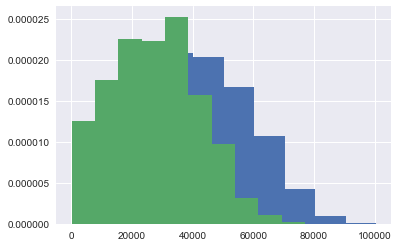

In [341]:
#np.diff returns the difference between the i+1 and i value of the array
distS = np.sqrt(np.diff(brk[brk.signal==True].values[:,1])**2+np.diff(brk[brk.signal==True].values[:,2])**2+np.diff(brk[brk.signal==True].values[:,3])**2)
distB = np.sqrt(np.diff(brk[brk.signal==False].values[:,1])**2+np.diff(brk[brk.signal==False].values[:,2])**2+np.diff(brk[brk.signal==False].values[:,3])**2)


print(np.mean(distS))
print(np.mean(distB))

plt.hist(distB,normed=1)
plt.hist(distS,normed=1)


(2938,)
(96493,)


(array([ 0.00287648,  0.05713415,  0.25927901,  0.56059064,  0.8186831 ,
         0.83234639,  0.58762958,  0.28078072,  0.06630294,  0.00388325]),
 array([-1.45239955, -1.1641741 , -0.87594866, -0.58772321, -0.29949776,
        -0.01127231,  0.27695314,  0.56517859,  0.85340403,  1.14162948,
         1.42985493]),
 <a list of 10 Patch objects>)

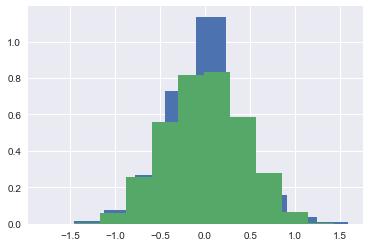

In [342]:
DTxS = np.diff(brk[brk.signal==True].values[:,4])
DTxB = np.diff(brk[brk.signal==False].values[:,4])
DTyS = np.diff(brk[brk.signal==True].values[:,5])
DTyB = np.diff(brk[brk.signal==False].values[:,5])

print(DTxS.shape)
print(DTxB.shape)

plt.hist(DTxS,normed=1)
plt.hist(DTxB,normed=1)



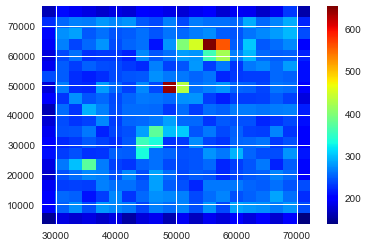

In [343]:
fig, ax = plt.subplots()
#plt.hist2d(brk[brk.signal==True].values[:,1],brk[brk.signal==True].values[:,2],bins=(100,100))
plt.hist2d(brk.values[:,1],brk.values[:,2],bins=(20,20),cmap='jet')
plt.colorbar()

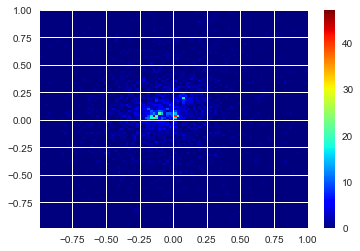

In [344]:
fig, ax = plt.subplots()
plt.hist2d(brk[brk.signal==True].values[:,4],brk[brk.signal==True].values[:,5],bins=(100,100),cmap='jet')
#plt.hist2d(brk.values[:,4],brk.values[:,5],bins=(50,50),cmap='jet')
plt.colorbar()

(array([   25.,    84.,   166.,   480.,  1086.,   698.,   231.,    94.,
           52.,    23.]),
 array([-0.99168344, -0.79266571, -0.59364797, -0.39463023, -0.19561249,
         0.00340525,  0.20242299,  0.40144073,  0.60045846,  0.7994762 ,
         0.99849394]),
 <a list of 10 Patch objects>)

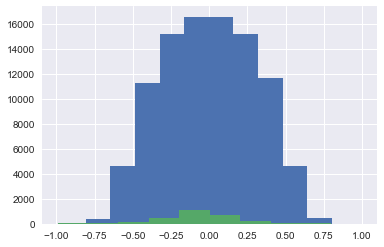

In [345]:
plt.hist(brk[brk.signal==0]["TX"])
plt.hist(brk[brk.signal==1]["TX"])


(array([   16.,    43.,    91.,   200.,   618.,  1291.,   420.,   145.,
           81.,    34.]),
 array([-0.9809194 , -0.7832421 , -0.58556481, -0.38788751, -0.19021022,
         0.00746708,  0.20514437,  0.40282167,  0.60049896,  0.79817626,
         0.99585355]),
 <a list of 10 Patch objects>)

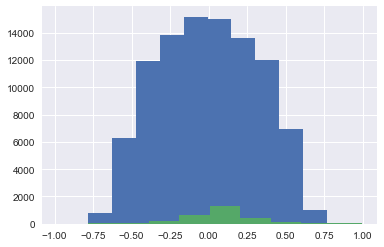

In [346]:
plt.hist(brk[brk.signal==0]["TY"])
plt.hist(brk[brk.signal==1]["TY"])

In [347]:
alpha_m = 0.05

In [348]:
nbt = np.array([])
for i in range(0,6):
    rangeX = ([20000+i*10000,20000+(i+1)*10000])
    #print("X: ",rangeX)
    for j in range(0,9):
        rangeY = ([j*5000,(j+1)*10000])
        #print(rangeY)
        sel = brk[(brk['X']<rangeX[1])&(brk['Z']>rangeX[0])&(brk['Y']>rangeY[0])&(brk['Y']<rangeY[1])]
        nbt=np.append(nbt,len(sel)).astype(int)
nbt = nbt.reshape(9,6)
print(nbt) 
print()
print(nbt>6000)

[[  228   566   738   923  1118  1327]
 [ 1500  1556  1384  1232  3168  4312]
 [ 5266  6354  7145  8250  8560  7541]
 [ 1753  4680  6356  7991  9903 11205]
 [12752 12974 11364  1760  4724  6294]
 [ 7918  9911 11384 13167 13388 11775]
 [ 1302  3416  4504  5667  7038  8084]
 [ 9379  9553  8415   252   696   959]
 [ 1201  1491  1708  1961  2041  1793]]
()
[[False False False False False False]
 [False False False False False False]
 [False  True  True  True  True  True]
 [False False  True  True  True  True]
 [ True  True  True False False  True]
 [ True  True  True  True  True  True]
 [False False False False  True  True]
 [ True  True  True False False False]
 [False False False False False False]]


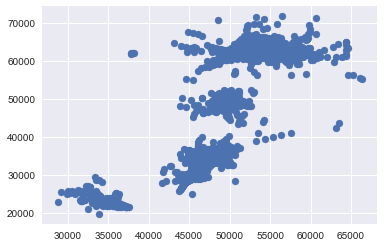

In [349]:
fig, ax = plt.subplots()
ax.scatter(brk[brk.signal==True].values[:,1],brk[brk.signal==True].values[:,2])


(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([ -27596.42958322,  -24622.42091589,  -21648.41224857,
         -18674.40358124,  -15700.39491391,  -12726.38624658,
          -9752.37757925,   -6778.36891192,   -3804.36024459,
           -830.35157726,    2143.65709006,    5117.66575739,
           8091.67442472,   11065.68309205,   14039.69175938,
          17013.70042671,   19987.70909404,   22961.71776136,
          25935.72642869,   28909.73509602,   31883.74376335,
          34857.75243068,   37831.76109801,   40805.76976534,
          43779.77843267,   46753.78709999,   49727.79576732,
          52701.80443465,   55675.81310198,   58649.82176931,
          61623.83043664,   64597.83910397,   67571.84777129,
          70545.85643862,   7351

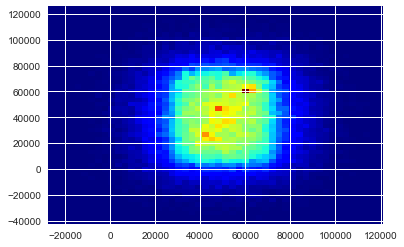

In [350]:
proj = projection(brk['X'],brk['Y'],brk['Z'],brk['TX'],brk['TY'],-brk['Z'])
plt.hist2d(proj[0],proj[1],bins=(50,50),cmap='jet')

In [441]:
def ComputeR(x,y,xc,yc):
    R = np.sqrt((x-xc)**2+(y-yc)**2)
    return R
def CheckSlopes(tx_0,ty_0,tx_1,ty_1):
    DTX = tx_0-tx_1
    DTY = ty_0-ty_1
    #print(tx_0,ty_0,tx_1,ty_1,DTX,DTY)
    if((np.abs(DTX)<0.05)&(np.abs(DTY)<0.05)):
        return True

In [446]:
R = 100 #open a circle of 500 um on each trk
ele_pos=np.array([])
#for z in z1[51:54]:
for z in z1:
    trk = brk[brk['Z'] == z]
    trk_proj = projection(trk['X'],trk['Y'],trk['Z'],trk['TX'],trk['TY'],1293)
    for j in range(len(trk_proj)):
        trk_nxt = brk[brk['Z'] == (z+1293)]
        for i in range(len(trk_nxt)):
            #print (trk_nxt['X'].iloc[i])
            R1=ComputeR(trk_nxt['X'].iloc[i],trk_nxt['X'].iloc[i],trk_proj[2,j],trk_proj[2,j])
            if R1<R:
                check = CheckSlopes(trk_proj[3,j],trk_proj[4,j],trk_nxt['TX'].iloc[i],trk_nxt['TY'].iloc[i])
                if check == True:
                    print (R1,check,z/1293)
                    ele_pos = np.append(ele_pos,[trk['X'].iloc[j],trk['Y'].iloc[j],trk['Z'].iloc[j]])
                    print(trk['signal'].iloc[j])
            #if ((tn['X'])
print (ele_pos)


(49.276503813937531, True, 21.0)
0.0
(24.936562580281841, True, 21.0)
0.0
(45.514474837867191, True, 29.0)
0.0
(95.536755264376197, True, 34.0)
0.0
(91.702910685130377, True, 39.0)
0.0
(81.65426034114067, True, 42.0)
0.0
(67.661280124787766, True, 43.0)
0.0
[ 59035.7617188  59326.7539062  27153.         33826.9335938  34836.1132812
  27153.         53112.0546875  44149.2109375  37497.         49095.828125
  26792.75       43962.         39599.0625     67095.859375   50427.
  38111.7890625  55645.5625     54306.         61163.1796875  19173.3046875
  55599.       ]


In [438]:
Rmax = np.tan(0.05)*1293
print(Rmax)

64.7039289296
